In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from google.colab import files
uploaded = files.upload()

Saving loan_borowwer_data.csv to loan_borowwer_data.csv


In [121]:
df=pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [123]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


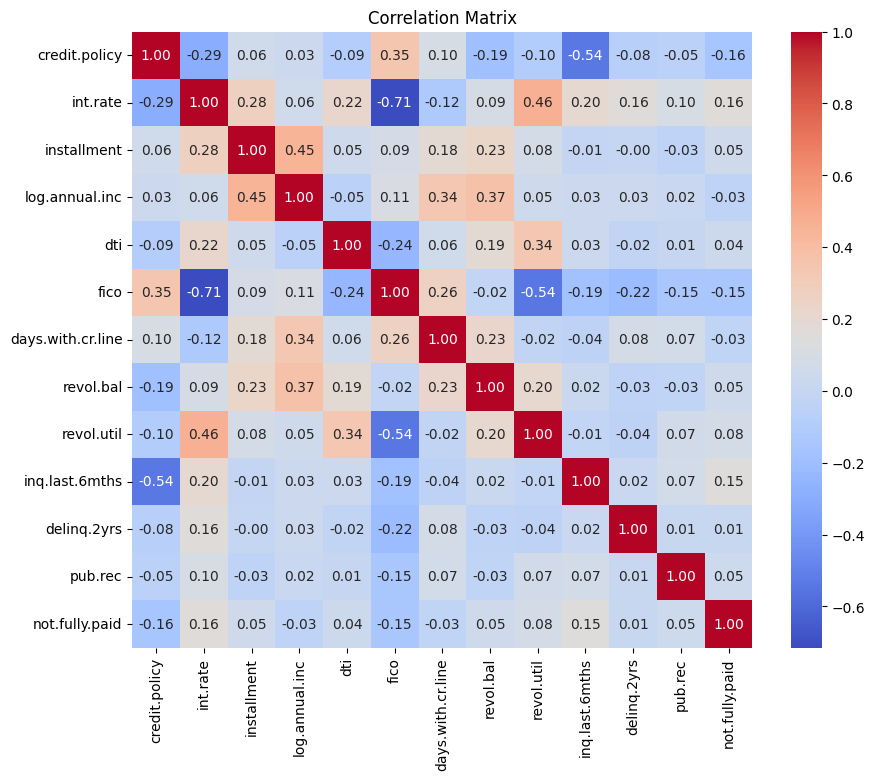

In [124]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [125]:
count=df.nunique()
count

,0
credit.policy,2
purpose,7
int.rate,249
installment,4788
log.annual.inc,1987
dti,2529
fico,44
days.with.cr.line,2687
revol.bal,7869
revol.util,1035


In [126]:
df.drop(['installment','revol.bal','pub.rec','delinq.2yrs'], axis=1,inplace=True)#doesnt drop unless inplace=true is used
df.head()

,credit.policy,purpose,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,11.350407,19.48,737,5639.958333,52.1,0,0
1,1,credit_card,0.1071,11.082143,14.29,707,2760.000000,76.7,0,0
2,1,debt_consolidation,0.1357,10.373491,11.63,682,4710.000000,25.6,1,0
3,1,debt_consolidation,0.1008,11.350407,8.10,712,2699.958333,73.2,1,0
4,1,credit_card,0.1426,11.299732,14.97,667,4066.000000,39.5,0,0


In [127]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
df.head()

,credit.policy,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,11.350407,19.48,737,5639.958333,52.1,0,0,False,True,False,False,False,False
1,1,0.1071,11.082143,14.29,707,2760.000000,76.7,0,0,True,False,False,False,False,False
2,1,0.1357,10.373491,11.63,682,4710.000000,25.6,1,0,False,True,False,False,False,False
3,1,0.1008,11.350407,8.10,712,2699.958333,73.2,1,0,False,True,False,False,False,False
4,1,0.1426,11.299732,14.97,667,4066.000000,39.5,0,0,True,False,False,False,False,False


In [128]:
dummy_cols = [col for col in df.columns if col.startswith('purpose_')]
df[dummy_cols] = df[dummy_cols].astype(int)
df.head()

,credit.policy,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,11.350407,19.48,737,5639.958333,52.1,0,0,0,1,0,0,0,0
1,1,0.1071,11.082143,14.29,707,2760.000000,76.7,0,0,1,0,0,0,0,0
2,1,0.1357,10.373491,11.63,682,4710.000000,25.6,1,0,0,1,0,0,0,0
3,1,0.1008,11.350407,8.10,712,2699.958333,73.2,1,0,0,1,0,0,0,0
4,1,0.1426,11.299732,14.97,667,4066.000000,39.5,0,0,1,0,0,0,0,0


In [129]:
X=df.drop(['not.fully.paid'],axis=1)
Y=df['not.fully.paid']

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [131]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = dt_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2408
           1       0.22      0.22      0.22       466

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.75      0.75      2874



In [133]:
print(confusion_matrix(Y_test,y_pred))

[[2041  367]
 [ 362  104]]


In [134]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [135]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.36      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [136]:
print(confusion_matrix(Y_test,y_pred))

[[2392   16]
 [ 457    9]]


In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [140]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.75      0.01      0.01       466

    accuracy                           0.84      2874
   macro avg       0.79      0.50      0.46      2874
weighted avg       0.82      0.84      0.77      2874



In [141]:
print(confusion_matrix(Y_test,y_pred))

[[2407    1]
 [ 463    3]]


In [143]:
df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533
